In [269]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

## Supervise Learning - Regression (Linear Regression)
Regresi adalah salah satu teknik ML yang mirip dengan klasifikasi. Bedanya pada klasifikasi, sebuah model ML memprediksi sebuah kelas, sedangkan model regresi memprediksi bilangan kontinu. Bilangan kontinu adalah bilangan numerik.
<br>
<br>
Regresi linier cocok dipakai ketika terdapat hubungan linear pada data. Namun untuk implementasi pada kebanyakan kasus, ia kurang direkomendasikan. Sebabnya, regresi linier selalu mengasumsikan ada hubungan linier pada data, padahal tidak
<br><br>
Dataset yang saya gunakan disini adalah House California yang nantinya akan diprediksi harganya.


Pada kasus ini kita akan menggunakan dataset KC House 
kita akan memprediksi penjualan rumah di King Country dengan akurasi minimal 75-80% dan <b><i>memahami faktor mana yang bertanggung jawab atas nilai properti yang lebih tinggi</i></b> - $650K ke atas.

In [270]:
df = pd.read_csv('./datasets/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Pada data diatas yang mempengaruhi harga rumah yaitu atribut bedrooms, bathrooms, sqft_living,
       sqft_lot, floors, waterfront, view, condition, grade,
       sqft_above, sqft_basement, yr_built, yr_renovated

Mari kita buat target dan datanya

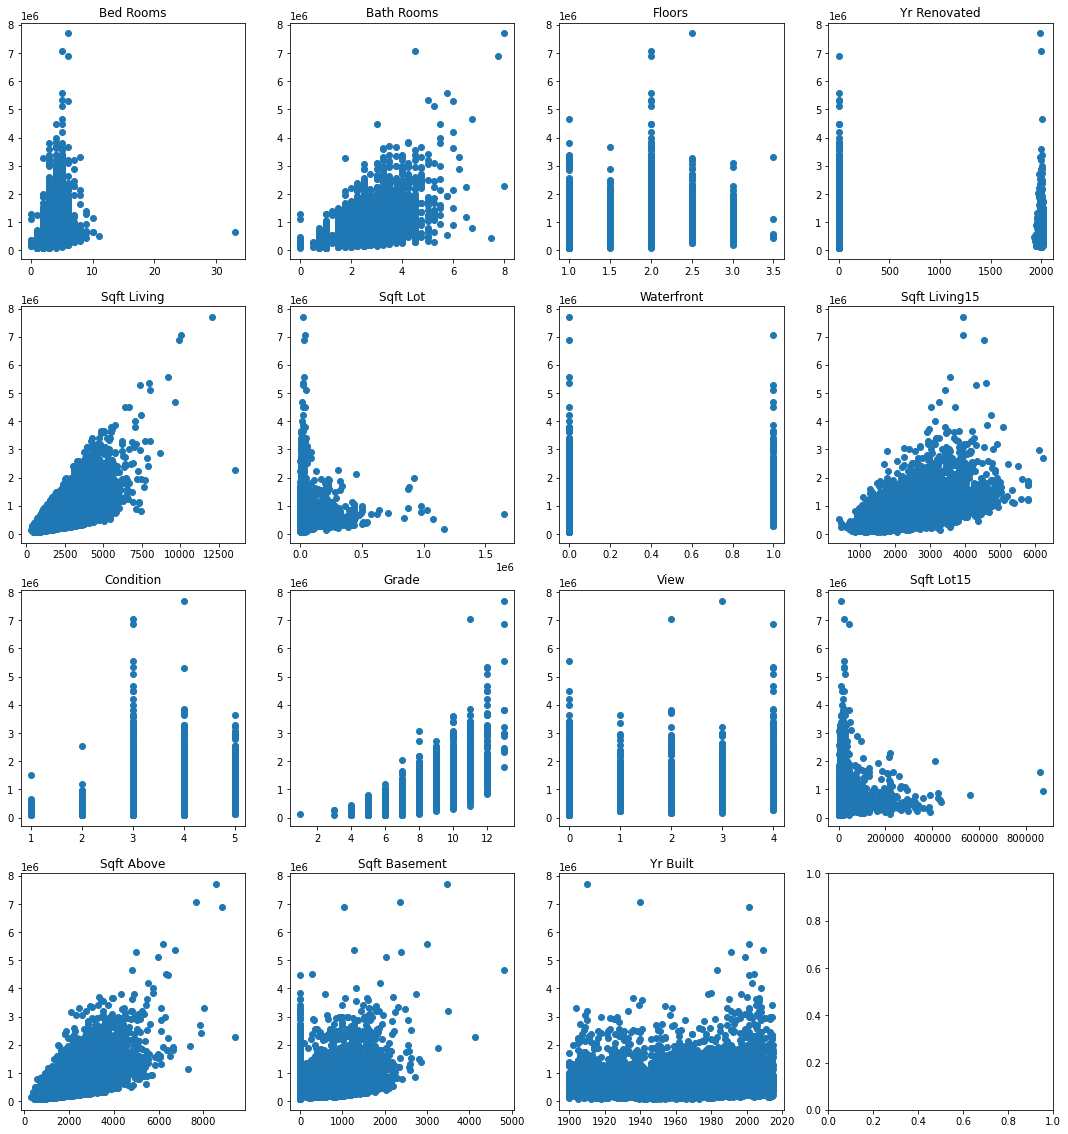

In [271]:
fig, axs = plt.subplots(4, 4)
axs[0, 0].scatter(df['bedrooms'], df['price'])
axs[0, 0].set_title('Bed Rooms')

axs[0, 1].scatter(df['bathrooms'], df['price'])
axs[0, 1].set_title('Bath Rooms')

axs[1, 0].scatter(df['sqft_living'], df['price'])
axs[1, 0].set_title('Sqft Living')

axs[1, 1].scatter(df['sqft_lot'], df['price'])
axs[1, 1].set_title('Sqft Lot')

axs[0, 2].scatter(df['floors'], df['price'])
axs[0, 2].set_title('Floors')

axs[2, 0].scatter(df['condition'], df['price'])
axs[2, 0].set_title('Condition')

axs[1, 2].scatter(df['waterfront'], df['price'])
axs[1, 2].set_title('Waterfront')

axs[2, 1].scatter(df['grade'], df['price'])
axs[2, 1].set_title('Grade')

axs[2, 2].scatter(df['view'], df['price'])
axs[2, 2].set_title('View')

axs[3, 0].scatter(df['sqft_above'], df['price'])
axs[3, 0].set_title('Sqft Above')

axs[3, 1].scatter(df['sqft_basement'], df['price'])
axs[3, 1].set_title('Sqft Basement')

axs[3, 2].scatter(df['yr_built'], df['price'])
axs[3, 2].set_title('Yr Built')

axs[0, 3].scatter(df['yr_renovated'], df['price'])
axs[0, 3].set_title('Yr Renovated')

axs[1, 3].scatter(df['sqft_living15'], df['price'])
axs[1, 3].set_title('Sqft Living15')

axs[2, 3].scatter(df['sqft_lot15'], df['price'])
axs[2, 3].set_title('Sqft Lot15')

fig.set_size_inches(18.5, 20)
plt.show()

In [272]:
df.drop(['zipcode', 'lat', 'long'], inplace=True, axis=1)

In [296]:
X = df[df.columns[3:]]
y = df[['price']]

In [297]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [298]:
linreg = LinearRegression()

In [299]:
linreg.fit(x_train, y_train)

LinearRegression()

In [277]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [278]:
x_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
7291,3,1.75,2190,7021,1.0,0,2,4,7,1390,800,1953,0,2180,7155
14835,3,2.50,2370,6840,2.0,0,0,3,9,2370,0,1987,0,1590,4400
15880,2,1.00,1230,3800,1.0,0,0,3,7,1230,0,1928,0,1610,3800
8812,4,2.25,2510,9963,1.0,0,0,4,9,2200,310,1967,0,3110,9963
17220,3,1.00,1160,7491,1.0,0,0,4,6,1160,0,1917,0,1800,2267


In [300]:
linreg.predict(x_test.loc[[19452]])

array([[-564910.2393141]])

In [301]:
x_test.loc[[19452]]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
19452,0,0.0,290,20875,1.0,0,0,1,1,290,0,1963,0,1620,22850


In [287]:
df[X.columns].iloc[[19452]]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
19452,0,0.0,290,20875,1.0,0,0,1,1,290,0,1963,0,1620,22850


In [282]:
df[(df['price'] > 400000) & (df['price'] < 480000)].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
11,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,1330,6000
28,5101402488,20140624T000000,438000.0,3,1.75,1520,6380,1.0,0,0,3,7,790,730,1948,0,1520,6235
48,9215400105,20150428T000000,450000.0,3,1.75,1250,5963,1.0,0,0,4,7,1250,0,1953,0,970,5100
59,8079040320,20150223T000000,430000.0,4,3.00,1850,9976,2.0,0,0,3,8,1850,0,1991,0,2270,8542
64,1189001180,20140603T000000,425000.0,3,2.25,1660,6000,1.0,0,0,3,7,1110,550,1979,0,1440,4080


In [307]:
cross_val_score(linreg, x_test, y_test, cv=5)

array([0.64536611, 0.607154  , 0.66162304, 0.69739645, 0.63767873])

In [286]:
x_test[x_test['grade'] < 5]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
19452,0,0.00,290,20875,1.0,0,0,1,1,290,0,1963,0,1620,22850
8623,1,0.75,410,8636,1.0,0,0,2,4,410,0,1953,0,1190,8636
18052,1,1.00,460,4120,1.0,0,0,3,4,460,0,1937,0,990,4120
12075,1,0.75,470,15000,1.0,0,0,3,4,470,0,1947,0,1730,22500


In [292]:
x_test.loc[19452]

bedrooms             0.0
bathrooms            0.0
sqft_living        290.0
sqft_lot         20875.0
floors               1.0
waterfront           0.0
view                 0.0
condition            1.0
grade                1.0
sqft_above         290.0
sqft_basement        0.0
yr_built          1963.0
yr_renovated         0.0
sqft_living15     1620.0
sqft_lot15       22850.0
Name: 19452, dtype: float64